In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [22]:
df = pd.read_csv('kenya_hospital_drug_stockout_dataset.csv')
df.head()

,Hospital_ID,County,Drug_Name,Drug_Category,Monthly_Consumption,Stock_On_Hand,Days_Out_of_Stock_Last_Month,Average_Reorder_Delay_Days,Lead_Time,Supplier,Budget_Utilization_%,Stock_Cover_Days,Stockout_Risk
0,NAI_001,Nairobi,Amoxicillin 500mg,Amoxicillin,1060,1294,7,9,23,KEMSA,72,36.6,Yes
1,NAI_001,Nairobi,Paracetamol 500mg,Paracetamol,530,1482,7,6,12,Private Vendor,73,83.9,Yes
2,NAI_001,Nairobi,Coartem 20/120mg,Coartem,330,1685,4,4,16,KEMSA,79,153.2,No
3,NAI_001,Nairobi,Insulin 100IU,Insulin,1415,955,4,3,16,Private Vendor,71,20.2,No
4,NAI_001,Nairobi,Ceftriaxone 1g,Ceftriaxone,947,856,0,12,20,County Depot,64,27.1,No


In [8]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Hospital_ID                   450 non-null    object 
 1   County                        450 non-null    object 
 2   Drug_Name                     450 non-null    object 
 3   Drug_Category                 450 non-null    object 
 4   Monthly_Consumption           450 non-null    int64  
 5   Stock_On_Hand                 450 non-null    int64  
 6   Days_Out_of_Stock_Last_Month  450 non-null    int64  
 7   Average_Reorder_Delay_Days    450 non-null    int64  
 8   Lead_Time                     450 non-null    int64  
 9   Supplier                      450 non-null    object 
 10  Budget_Utilization_%          450 non-null    int64  
 11  Stock_Cover_Days              450 non-null    float64
 12  Stockout_Risk                 450 non-null    object 
dtypes: fl

Hospital_ID                     0
County                          0
Drug_Name                       0
Drug_Category                   0
Monthly_Consumption             0
Stock_On_Hand                   0
Days_Out_of_Stock_Last_Month    0
Average_Reorder_Delay_Days      0
Lead_Time                       0
Supplier                        0
Budget_Utilization_%            0
Stock_Cover_Days                0
Stockout_Risk                   0
dtype: int64

In [9]:
df["Stockout_Risk"].value_counts(normalize=True)

Stockout_Risk
Yes    0.6
No     0.4
Name: proportion, dtype: float64

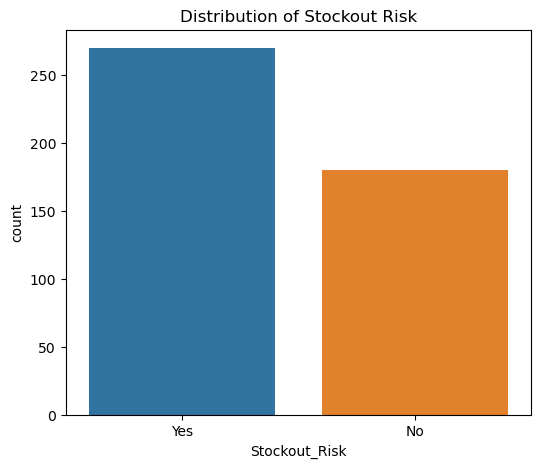

In [15]:
# Genreral overall distribution of Stockout Risk
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Stockout_Risk')
plt.title('Distribution of Stockout Risk')
plt.show()

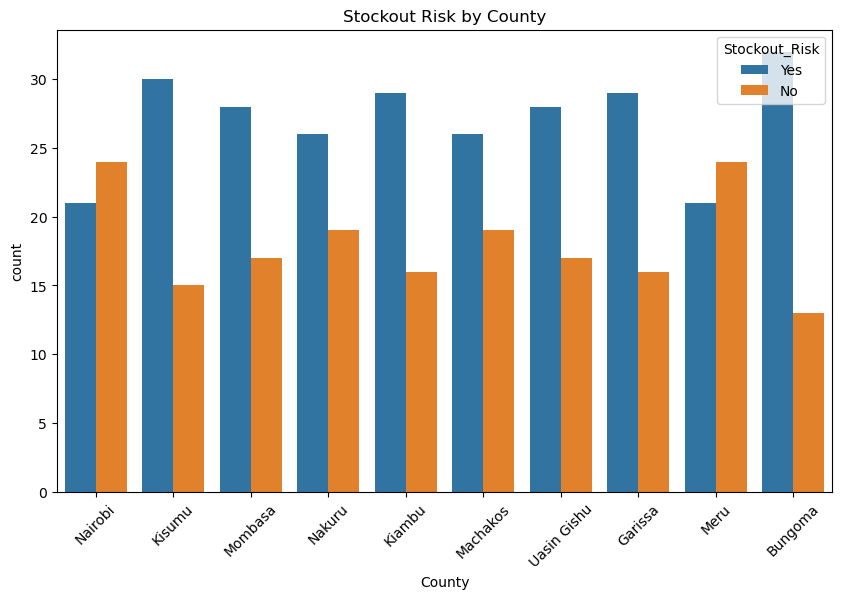

In [16]:
# By county
plt .figure(figsize=(10,6))
sns.countplot(data=df, x="County", hue="Stockout_Risk")
plt.title("Stockout Risk by County")
plt.xticks(rotation=45)
plt.show()

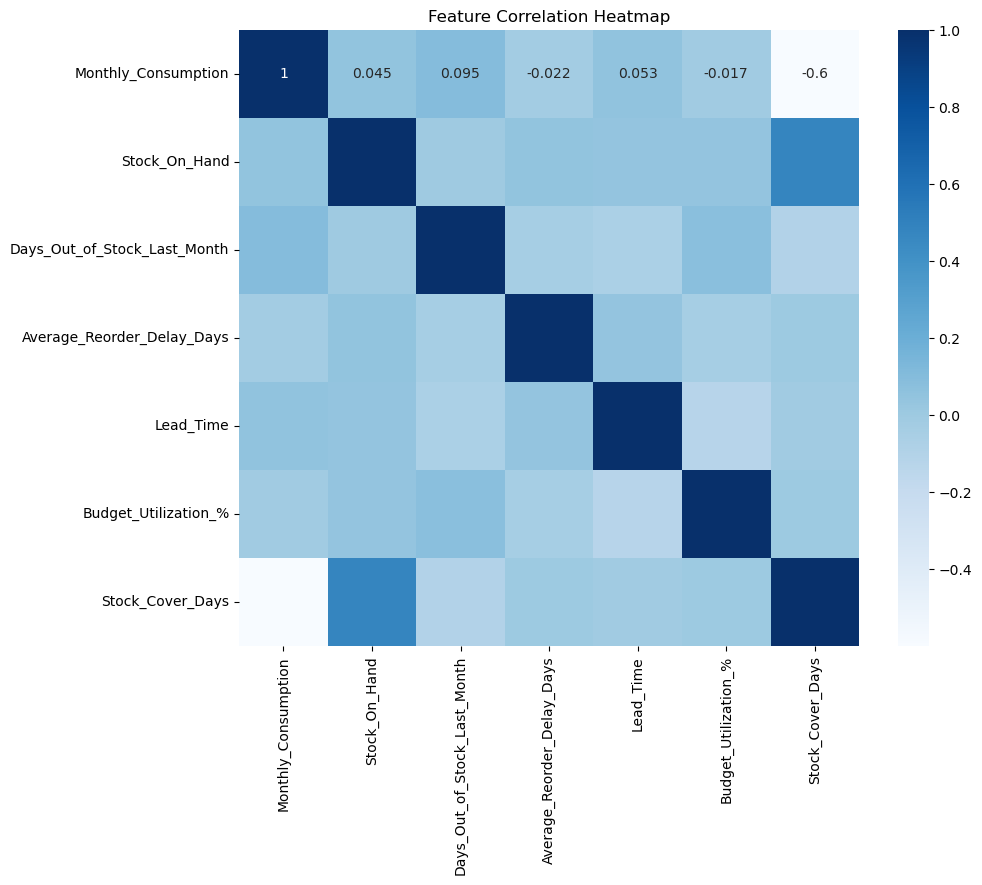

In [17]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()

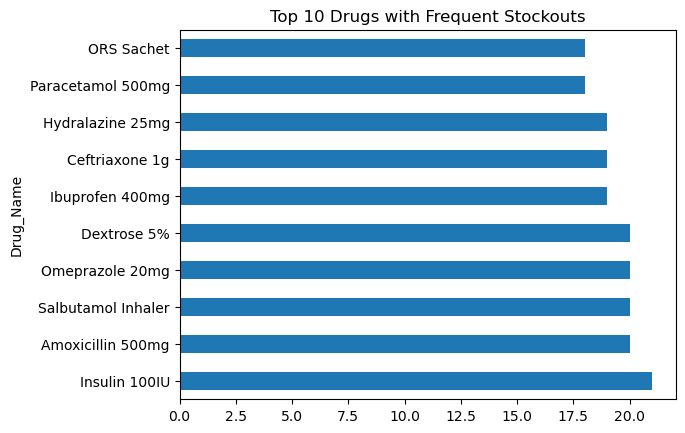

In [ ]:
# Top 10 drugs with frequent stockouts
at_risk = df[df["Stockout_Risk"]=="Yes"]["Drug_Name"].value_counts().head(10)
at_risk.plot(kind="barh", title="Top 10 Drugs with Frequent Stockouts")
plt.show()

Goal: Find which counties, drugs, or factors contribute most to stockouts.

In [20]:
df["Consumption_to_Stock_Ratio"] = df["Monthly_Consumption"] / (df["Stock_On_Hand"] + 1)
df["Delay_vs_Lead"] = df["Average_Reorder_Delay_Days"] / (df["Lead_Time"] + 1)
df

,Hospital_ID,County,Drug_Name,Drug_Category,Monthly_Consumption,Stock_On_Hand,Days_Out_of_Stock_Last_Month,Average_Reorder_Delay_Days,Lead_Time,Supplier,Budget_Utilization_%,Stock_Cover_Days,Stockout_Risk,Consumption_to_Stock_Ratio,Delay_vs_Lead
0,NAI_001,Nairobi,Amoxicillin 500mg,Amoxicillin,1060,1294,7,9,23,KEMSA,72,36.6,Yes,0.818533,0.375000
1,NAI_001,Nairobi,Paracetamol 500mg,Paracetamol,530,1482,7,6,12,Private Vendor,73,83.9,Yes,0.357384,0.461538
2,NAI_001,Nairobi,Coartem 20/120mg,Coartem,330,1685,4,4,16,KEMSA,79,153.2,No,0.195730,0.235294
3,NAI_001,Nairobi,Insulin 100IU,Insulin,1415,955,4,3,16,Private Vendor,71,20.2,No,1.480126,0.176471
4,NAI_001,Nairobi,Ceftriaxone 1g,Ceftriaxone,947,856,0,12,20,County Depot,64,27.1,No,1.105018,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,BUN_003,Bungoma,Cotrimoxazole 480mg,Cotrimoxazole,1052,1540,1,18,6,Private Vendor,59,43.9,Yes,0.682674,2.571429
446,BUN_003,Bungoma,Salbutamol Inhaler,Salbutamol,297,1167,2,9,16,KEMSA,73,117.9,No,0.254281,0.529412
447,BUN_003,Bungoma,Omeprazole 20mg,Omeprazole,1517,1979,9,5,23,County Depot,98,39.1,Yes,0.766162,0.208333
448,BUN_003,Bungoma,Hydralazine 25mg,Hydralazine,1159,31,6,6,18,KEMSA,71,0.8,Yes,36.218750,0.315789


Goal is to create smarter indicators that highlight supply inefficiencies.

In [24]:
# Select features
X = df[["Monthly_Consumption", "Stock_On_Hand", "Days_Out_of_Stock_Last_Month",
        "Average_Reorder_Delay_Days", "Lead_Time", "Budget_Utilization_%", "Stock_Cover_Days"]]
y = df["Stockout_Risk"].map({"Yes": 1, "No": 0})

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [27]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Evaluate
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        54

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



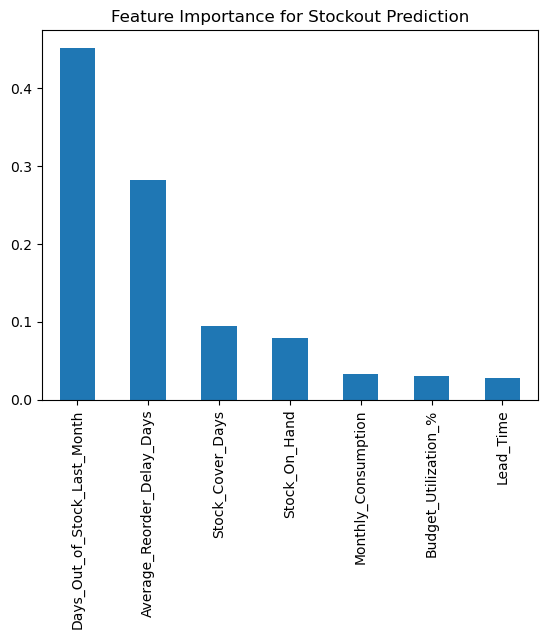

In [29]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='bar', title='Feature Importance for Stockout Prediction')
plt.show()


### Insight
Feature importance analysis shows that Stock_Cover_Days, Average_Reorder_Delay_Days and Days_Out_of_Stock_Last_Month are the top predictors of drug shortages.


Hospitals can focus on these three indicators in daily monitoring dashboards to reduce stockouts proactively.

<Axes: xlabel='Supplier', ylabel='Average_Reorder_Delay_Days'>

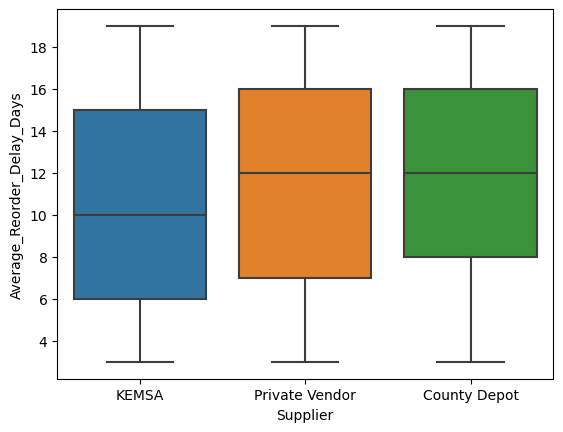

In [30]:
sns.boxplot(data=df, x="Supplier", y="Average_Reorder_Delay_Days")
